In [199]:
#Установка всех необходимых модулей
"""
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install tensorflow
%pip install scikit-learn
%pip install tensorflow
%pip install keras
"""


'\n%pip install pandas\n%pip install numpy\n%pip install matplotlib\n%pip install tensorflow\n%pip install scikit-learn\n%pip install tensorflow\n%pip install keras\n'

In [200]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [201]:
df = pd.read_csv("LOGI.csv", parse_dates=["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-03-27,2.062500,2.093750,2.000000,2.023438,1.525964,10659200
1,1997-03-31,2.046875,2.046875,2.000000,2.031250,1.531856,1594400
2,1997-04-01,2.078125,2.093750,2.031250,2.093750,1.578990,2324000
3,1997-04-02,2.132813,2.140625,2.062500,2.062500,1.555423,745600
4,1997-04-03,2.093750,2.109375,2.046875,2.093750,1.578990,651200
...,...,...,...,...,...,...,...
6768,2024-02-20,87.620003,87.980003,86.739998,87.790001,87.790001,466700
6769,2024-02-21,86.750000,87.230003,86.290001,86.739998,86.739998,512400
6770,2024-02-22,87.839996,89.290001,87.800003,89.000000,89.000000,364000
6771,2024-02-23,90.000000,90.000000,89.120003,89.639999,89.639999,288400


In [202]:
df[["Open", "Close", "Low", "High"]].corr()

,Open,Close,Low,High
Open,1.000000,0.999792,0.999882,0.999900
Close,0.999792,1.000000,0.999909,0.999901
Low,0.999882,0.999909,1.000000,0.999853
High,0.999900,0.999901,0.999853,1.000000


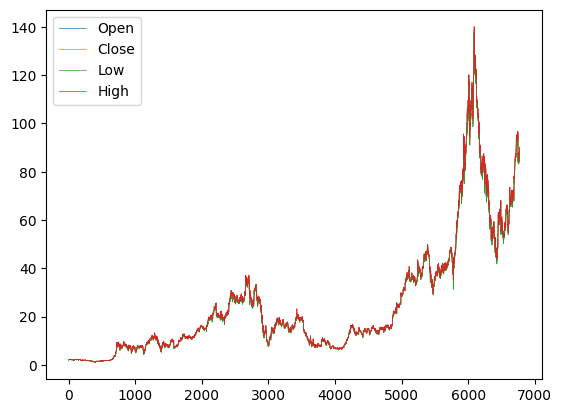

In [203]:
plt.plot(df[["Open", "Close", "Low", "High"]], label = ["Open", "Close", "Low", "High"], linewidth = 0.5)
plt.legend()

In [204]:
#   Разделение данных на тестовые и тренеровочные
def stab_data(name_col):
    "Нормализация данных"
    column = df[name_col].astype('float')
    #train = column[:int(len(column))] #не обязательно. ничего не делает, в случае чего, позже можно будет удалить
    scale_col = MinMaxScaler()
    scale_col.fit(column.values.reshape(-1, 1))
    column = scale_col.transform(column.values.reshape(-1, 1))
    return column


def xyarray(data):
    "Разбиение массива на x y "
    x, y = [], []
    for i in range(len(data) - lb - 1):
        x.append(data[i:(i + lb), 0])
        y.append(data[(i + lb), 0])
    return np.array(x), np.array(y)

"""Разбиение на тестовые и тренеровочные данные"""
lb = 10 
val = 0.9
x,y = xyarray(stab_data("Close"))

x_train, x_test = x[:int(x.shape[0] * val)], x[int(x.shape[0] * val):]
y_train, y_test = y[:int(x.shape[0] * val)], y[int(x.shape[0] * val):]
print(f"x train -> {x_train.shape}  \ny train -> {y_train.shape}  \nx test  -> {x_test.shape} \ny test  -> {y_test.shape}")

x train -> (6085, 10)  
y train -> (6085,)  
x test  -> (677, 10) 
y test  -> (677,)


Раздел с обучением

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation

Epoch 1/50
191/191 [==============================] - 2s 6ms/step - loss: 7.6001e-04
Epoch 2/50
191/191 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 3/50
191/191 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 4/50
191/191 [==============================] - 1s 7ms/step - loss: 3.5574e-04
Epoch 5/50
191/191 [==============================] - 1s 7ms/step - loss: 4.2636e-04
Epoch 6/50
191/191 [==============================] - 1s 6ms/step - loss: 4.9797e-04
Epoch 7/50
191/191 [==============================] - 1s 6ms/step - loss: 1.9329e-04
Epoch 8/50
191/191 [==============================] - 1s 6ms/step - loss: 1.4019e-04
Epoch 9/50
191/191 [==============================] - 1s 6ms/step - loss: 8.6003e-05
Epoch 10/50
191/191 [==============================] - 1s 6ms/step - loss: 2.4373e-04
Epoch 11/50
191/191 [==============================] - 1s 6ms/step - loss: 2.9914e-04
Epoch 12/50
191/191 [==============================] - 1s 6ms/step - lo

0.0002000451786443591

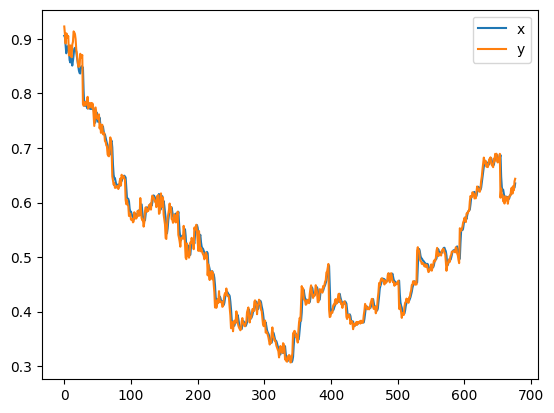

In [247]:
#Создание модели
model = Sequential([
            LSTM(128, input_shape = (lb, 1), return_sequences = True),
            Dropout(0.1),
            LSTM(10),
            Dense(1)
        ])
model.compile(optimizer = 'adam', loss = 'mse')

history = model.fit(x_train, y_train, epochs = 50, shuffle=False)
get_result()
model.evaluate(x_test, y_test)

In [210]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [234]:
def get_result():
    result_predict = model.predict(x_test)

    plt.plot(result_predict, label = 'x')
    plt.plot(y_test, label = 'y')
    plt.legend()
    